So far, you have had experience predicting data which fits probability distribution such as normal and binomial distribution. However, data does not always fit nicely against these well-known distribution types. When this occurs, one of your options is to use the Empirical Cumulative Distribution Function (ECDF) and historical data to predict future data values.

The ECDF is calculated by ordering all of the unique observations in the data sample and calculating the cumulative probability for each as the number of observations less than or equal to a given observation divided by the total number of observations.

In this try-it activity, you will use Python to create a sample dataset and analyze the ECDF against the generated data. First let us start by creating a non-normally distributed data set. We can do this by creating a two-peak dataset by combining two normal distributions.

In [2]:
# example of a bimodal data sample
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
# generate a sample
sample1 = normal(loc=80, scale=5, size=300)
sample2 = normal(loc=60, scale=5, size=700)
sample = hstack((sample1, sample2))

sample

array([84.63565569, 79.24858716, 85.48588991, 74.06221943, 77.19159192,
       73.10843336, 73.48424603, 79.42806361, 74.98935214, 84.09116242,
       83.69036897, 72.96609738, 78.85958526, 76.45918869, 78.53687127,
       81.03380867, 83.84744686, 77.65820761, 77.19916483, 73.28442059,
       85.37218715, 78.58741323, 84.14476105, 86.96312538, 89.9468423 ,
       75.326322  , 77.42225775, 81.41158682, 74.34982266, 85.52294782,
       80.4754404 , 77.30928926, 90.75177655, 83.23615222, 89.50392495,
       90.66687428, 80.35551749, 83.33281743, 88.23994375, 78.82262751,
       72.27911104, 74.18374784, 82.9276724 , 65.98481591, 84.0843947 ,
       78.71759797, 85.23945381, 80.23709637, 74.37746458, 77.4190845 ,
       84.03981878, 76.80434135, 79.09249426, 86.34479956, 83.23333206,
       83.33022603, 80.99836742, 76.54622055, 85.01062888, 90.0268065 ,
       80.4104809 , 78.09678793, 79.78091008, 62.17616884, 75.81996974,
       75.53803388, 78.57879786, 76.91590394, 66.97534784, 79.74

This dataset will represent an entire state's benchmark score on their state exam. Their scores can be any number between 0 and 100 (extra credit was not an option). Printing the data out like this does not do much, so let us view a histogram of the data to visuaslize it more. 

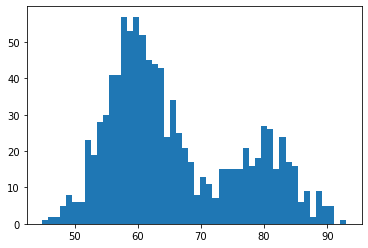

In [3]:
pyplot.hist(sample, bins=50)
pyplot.show()

As you can see, this is **not normally distributed**. Let us find some other information out about the exam scored. 

In [4]:
from tabulate import tabulate

def range(x, axis=0):
    return np.max(x, axis=axis) - np.min(x, axis=axis)

data = [
["Mean: ", np.mean(sample)],
["Max Score", np.max(sample)],
["Min Score", np.min(sample)],
["Range:", range(sample)]]

print (tabulate(data))

---------  -------
Mean:      65.8126
Max Score  93.0328
Min Score  44.8533
Range:     48.1795
---------  -------


From this we can see the highest score was 94%, lowest was a 43% with an average of 65%. Let us use the empirical distribution function to find the probability of future student's receiving certain scores. 

In [8]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF 

ecdf = ECDF(sample)

data = [
["P(x<94): ", ecdf(94)],
["P(x<44): ", ecdf(44)],
["P(x<Mean):", ecdf(np.mean(sample))]]

print (tabulate(data))


----------  -----
P(x<94):    1
P(x<44):    0
P(x<Mean):  0.615
----------  -----


One thing that is noteworthy about the previous step, is we discovered that although the average score was a 65%, there is an above average probability a random student's score is below the average. As seen in previous modules, statistically calculating what you'd expect a random varaible to be can often be vastly different than what you would discover using probability. 

Let us take a look at the probability a student's score falls within the following ranges. 

In [9]:
data = [
["P(x>90): ", 1 - ecdf(90)],
["P(x>75): ", 1 - ecdf(75)],
["P(x<50):", ecdf(50)]]

print (tabulate(data))

--------  -----
P(x>90):  0.007
P(x>75):  0.242
P(x<50):  0.02
--------  -----


Lastley, let us visualize the explanation of this by printing out the empirical distribution's CDF. 

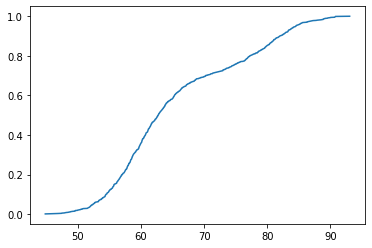

In [10]:

# plot the cdf of the empirical distribution
pyplot.plot(ecdf.x, ecdf.y)
pyplot.show()